In [1]:
import sys

sys.path.append('/projects/metalsitenn/pdbx')

from metalsitenn.placer_modules.cifutils import CIFParser, mutate_chain

from metalsitenn.utils import visualize_metal_site_3d, visualize_chain_3d
from metalsitenn.dataloading import MetalSiteDataset

from metalsitenn.featurizer import MetalSiteFeaturizer
from metalsitenn.utils import visualize_featurized_metal_site_3d
import pandas as pd
import numpy as np
import torch

## CIF parser for getting metal sites

In [2]:
parser = CIFParser()

In [3]:
parsed_data = parser.parse('/datasets/alphafold_data/data_v2/pdb_mmcif/mmcif_files/4fca.cif')

In [4]:
chains, assemblies, covalent_bonds, metadata = parsed_data

In [5]:
print(type(chains['A']))

<class 'metalsitenn.placer_modules.cifutils.Chain'>


In [ ]:
chains['A'].residues

{'15': Residue(name='GLU', atoms={'N': Atom(name='N', xyz=[50.519, 21.123, 14.327], occ=1.0, bfac=97.17, leaving=False, leaving_group=['H2'], parent='CA', element=7, metal=False, charge=1, hyb=3, nhyd=3, hvydeg=1, align=1, hetero=False), 'CA': Atom(name='CA', xyz=[49.192, 21.679, 14.079], occ=1.0, bfac=88.33, leaving=False, leaving_group=[], parent='CB', element=6, metal=False, charge=0, hyb=3, nhyd=1, hvydeg=3, align=1, hetero=False), 'C': Atom(name='C', xyz=[48.087, 20.672, 14.42], occ=1.0, bfac=89.4, leaving=False, leaving_group=['OXT', 'HXT'], parent='OXT', element=6, metal=False, charge=0, hyb=2, nhyd=0, hvydeg=3, align=1, hetero=False), 'O': Atom(name='O', xyz=[46.942, 20.828, 13.986], occ=1.0, bfac=84.53, leaving=False, leaving_group=[], parent='C', element=8, metal=False, charge=0, hyb=2, nhyd=0, hvydeg=1, align=1, hetero=False), 'CB': Atom(name='CB', xyz=[49.068, 22.161, 12.624], occ=1.0, bfac=89.07, leaving=False, leaving_group=[], parent='CG', element=6, metal=False, charge=

In [8]:
sites = parser.get_metal_sites(parsed_data, max_atoms_per_site=500, max_water_bfactor=15, merge_threshold=6, cutoff_distance=6, backbone_treatment='free')

In [9]:
site = sites[0]
site_chain = site['site_chain']

In [10]:
site['site_chain'].residues

{'1': Residue(name='HIS', atoms={'N': Atom(name=('A', '1', 'HIS', 'N'), xyz=[15.422, 32.238, 34.887], occ=1.0, bfac=43.3, leaving=False, leaving_group=['H2'], parent='CA', element=7, metal=False, charge=0, hyb=2, nhyd=1, hvydeg=1, align=1, hetero=False), 'CA': Atom(name=('A', '1', 'HIS', 'CA'), xyz=[14.164, 31.642, 34.428], occ=1.0, bfac=35.09, leaving=False, leaving_group=[], parent='CB', element=6, metal=False, charge=0, hyb=3, nhyd=1, hvydeg=3, align=1, hetero=False), 'C': Atom(name=('A', '1', 'HIS', 'C'), xyz=[14.395, 30.558, 33.369], occ=1.0, bfac=39.43, leaving=False, leaving_group=['OXT', 'HXT'], parent='OXT', element=6, metal=False, charge=0, hyb=2, nhyd=0, hvydeg=3, align=1, hetero=False), 'O': Atom(name=('A', '1', 'HIS', 'O'), xyz=[13.881, 29.428, 33.49], occ=1.0, bfac=41.23, leaving=False, leaving_group=[], parent='C', element=8, metal=False, charge=0, hyb=2, nhyd=0, hvydeg=1, align=1, hetero=False), 'CB': Atom(name=('A', '1', 'HIS', 'CB'), xyz=[13.301, 32.78, 33.859], occ=1

In [11]:
site_chain.residues

{'1': Residue(name='HIS', atoms={'N': Atom(name=('A', '1', 'HIS', 'N'), xyz=[15.422, 32.238, 34.887], occ=1.0, bfac=43.3, leaving=False, leaving_group=['H2'], parent='CA', element=7, metal=False, charge=0, hyb=2, nhyd=1, hvydeg=1, align=1, hetero=False), 'CA': Atom(name=('A', '1', 'HIS', 'CA'), xyz=[14.164, 31.642, 34.428], occ=1.0, bfac=35.09, leaving=False, leaving_group=[], parent='CB', element=6, metal=False, charge=0, hyb=3, nhyd=1, hvydeg=3, align=1, hetero=False), 'C': Atom(name=('A', '1', 'HIS', 'C'), xyz=[14.395, 30.558, 33.369], occ=1.0, bfac=39.43, leaving=False, leaving_group=['OXT', 'HXT'], parent='OXT', element=6, metal=False, charge=0, hyb=2, nhyd=0, hvydeg=3, align=1, hetero=False), 'O': Atom(name=('A', '1', 'HIS', 'O'), xyz=[13.881, 29.428, 33.49], occ=1.0, bfac=41.23, leaving=False, leaving_group=[], parent='C', element=8, metal=False, charge=0, hyb=2, nhyd=0, hvydeg=1, align=1, hetero=False), 'CB': Atom(name=('A', '1', 'HIS', 'CB'), xyz=[13.301, 32.78, 33.859], occ=1

In [12]:
site_chain.atoms

{('A',
  '1',
  'HIS',
  'N'): Atom(name=('A', '1', 'HIS', 'N'), xyz=[15.422, 32.238, 34.887], occ=1.0, bfac=43.3, leaving=False, leaving_group=['H2'], parent='CA', element=7, metal=False, charge=0, hyb=2, nhyd=1, hvydeg=1, align=1, hetero=False),
 ('A',
  '1',
  'HIS',
  'CA'): Atom(name=('A', '1', 'HIS', 'CA'), xyz=[14.164, 31.642, 34.428], occ=1.0, bfac=35.09, leaving=False, leaving_group=[], parent='CB', element=6, metal=False, charge=0, hyb=3, nhyd=1, hvydeg=3, align=1, hetero=False),
 ('A',
  '1',
  'HIS',
  'C'): Atom(name=('A', '1', 'HIS', 'C'), xyz=[14.395, 30.558, 33.369], occ=1.0, bfac=39.43, leaving=False, leaving_group=['OXT', 'HXT'], parent='OXT', element=6, metal=False, charge=0, hyb=2, nhyd=0, hvydeg=3, align=1, hetero=False),
 ('A',
  '1',
  'HIS',
  'O'): Atom(name=('A', '1', 'HIS', 'O'), xyz=[13.881, 29.428, 33.49], occ=1.0, bfac=41.23, leaving=False, leaving_group=[], parent='C', element=8, metal=False, charge=0, hyb=2, nhyd=0, hvydeg=1, align=1, hetero=False),
 ('A

In [13]:
site_chain.planars

[[('A', '1', 'HIS', 'CG'),
  ('A', '1', 'HIS', 'CB'),
  ('A', '1', 'HIS', 'ND1'),
  ('A', '1', 'HIS', 'CD2')],
 [('A', '2', 'GLU', 'CD'),
  ('A', '2', 'GLU', 'CG'),
  ('A', '2', 'GLU', 'OE1'),
  ('A', '2', 'GLU', 'OE2')],
 [('A', '3', 'HIS', 'CG'),
  ('A', '3', 'HIS', 'CB'),
  ('A', '3', 'HIS', 'ND1'),
  ('A', '3', 'HIS', 'CD2')],
 [('A', '5', 'GLU', 'CD'),
  ('A', '5', 'GLU', 'CG'),
  ('A', '5', 'GLU', 'OE1'),
  ('A', '5', 'GLU', 'OE2')]]

In [14]:
site_chain.chirals

[[('A', '1', 'HIS', 'CA'),
  ('A', '1', 'HIS', 'N'),
  ('A', '1', 'HIS', 'CB'),
  ('A', '1', 'HIS', 'C')],
 [('A', '2', 'GLU', 'CA'),
  ('A', '2', 'GLU', 'N'),
  ('A', '2', 'GLU', 'CB'),
  ('A', '2', 'GLU', 'C')],
 [('A', '3', 'HIS', 'CA'),
  ('A', '3', 'HIS', 'N'),
  ('A', '3', 'HIS', 'CB'),
  ('A', '3', 'HIS', 'C')],
 [('A', '5', 'GLU', 'CA'),
  ('A', '5', 'GLU', 'N'),
  ('A', '5', 'GLU', 'CB'),
  ('A', '5', 'GLU', 'C')],
 [('A', '6', 'VAL', 'CA'),
  ('A', '6', 'VAL', 'N'),
  ('A', '6', 'VAL', 'CB'),
  ('A', '6', 'VAL', 'C')]]

In [15]:

viewer = visualize_metal_site_3d(site)
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Dataset

Note called dataset parser as a batch job.
See stage 1.1_parse_sites_metadata

Here we are loading from the cache

In [3]:
ds = MetalSiteDataset(cache_folder='../data/1/1.1_parse_sites_metadata')

In [4]:
df = ds.get_all_metadata()
df

,pdb_code,site_name,site_idx,n_entities,n_atoms,n_bonds,metal,n_metals,n_waters,n_organic_ligands,...,n_amino_acids,n_coordinating_amino_acids,n_nucleotides,non_residue_non_metal_names,n_non_residue_non_metal,coordination_distance,n_unresolved_removed,coordinating_residues,resolution,max_rczd
0,6fpw,6fpw_0,0,19,158,150,Fe,4,0,0,...,18,4,0,NaN,0,2.9,0,"2,9,12,3",1.35,NaN
1,6fpw,6fpw_1,1,22,138,124,Fe,3,3,0,...,18,3,0,NaN,0,2.9,0,"7,16,13",1.35,NaN
2,6fpw,6fpw_2,2,29,203,184,Fe,4,2,0,...,26,6,0,NaN,0,2.9,0,"13,5,15,3,19,6",1.35,NaN
3,6fpw,6fpw_3,3,20,141,123,"Fe,Ni",2,0,0,...,19,4,0,NaN,0,2.9,0,"6,19,3,17",1.35,NaN
4,6fpw,6fpw_4,4,19,101,83,Mg,1,6,0,...,12,3,0,NaN,0,2.9,0,"12,6,1",1.35,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126231,1fyu,1fyu_0,0,15,103,93,Mn,1,1,0,...,12,4,0,NaN,0,2.9,0,"2,1,7,5",2.60,NaN
126232,1fyu,1fyu_1,1,18,130,117,Ca,1,1,1,...,14,4,0,GAL,1,2.9,0,"5,7,9,11",2.60,NaN
126233,1fyu,1fyu_2,2,16,104,93,Mn,1,2,0,...,12,4,0,NaN,0,2.9,0,"2,1,5,7",2.60,NaN
126234,1fyu,1fyu_3,3,18,123,110,Ca,1,2,1,...,13,4,0,GAL,1,2.9,0,"5,7,11,9",2.60,NaN


In [ ]:
hits = df[df["pdb_code"].str.lower() == "4fca"]
print(hits)

In [ ]:
_, site_chain = ds[1]
print(_)

In [ ]:
site_chain

In [ ]:
visualize_chain_3d(site_chain)

### Try filtering sites ...

Only one metal per site, only one sit per pdb

In [ ]:
ds = MetalSiteDataset(
    cache_folder='../data/1/1.1_parse_sites_metadata',
    max_sites_per_pdb=1,
    max_metals=1,
)

In [ ]:
len(ds)

In [ ]:
df = ds.get_filtered_metadata()
df

In [ ]:
df

In [ ]:
visualize_chain_3d(ds[-1][1])

Also only cobolt and nickel, no orgnanic ligands

In [ ]:
ds = MetalSiteDataset(
    cache_folder='../data/1/1.1_parse_sites_metadata',
    max_sites_per_pdb=1,
    max_metals=1,
    max_organic_ligands=0,
    valid_metals=['Co', 'Ni','Cu'],
    max_max_rczd=10
)
df = ds.get_filtered_metadata()

# pdb_code to csv from df
df['pdb_code'].to_csv('Co_Ni_Cu_1_site_1_metal_max_10_rczd.csv', index=False)



,pdb_code,site_name,site_idx,n_entities,n_atoms,n_bonds,metal,n_metals,n_waters,n_organic_ligands,...,n_amino_acids,n_coordinating_amino_acids,n_nucleotides,non_residue_non_metal_names,n_non_residue_non_metal,coordination_distance,n_unresolved_removed,coordinating_residues,resolution,max_rczd
239,4fca,4fca_0,0,7,50,45,Ni,1,0,0,...,6,3,0,NaN,0,2.9,0,"1,5,3",2.055,3.1
1668,4yea,4yea_0,0,14,78,64,Cu,1,0,0,...,13,4,0,NaN,0,2.9,0,"5,8,11,2",2.140,3.7
1998,2w3t,2w3t_0,0,15,89,77,Ni,1,3,0,...,11,3,0,NaN,0,2.9,0,"9,7,4",1.690,2.5
2003,4csz,4csz_0,0,11,78,71,Cu,1,0,0,...,10,4,0,NaN,0,2.9,0,"4,9,10,6",1.750,7.0
2168,5nzy,5nzy_0,0,8,65,62,Ni,1,0,0,...,7,4,0,NaN,0,2.9,0,"1,2,6,4",1.551,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122563,5vf5,5vf5_0,0,10,74,69,Cu,1,0,0,...,9,3,0,NaN,0,2.9,0,"9,4,6",1.490,2.0
124120,6gtk,6gtk_0,0,12,90,82,Cu,1,0,0,...,11,4,0,NaN,0,2.9,0,"11,10,5,7",1.500,2.3
124484,2fk1,2fk1_0,0,6,49,46,Cu,1,0,0,...,5,3,0,NaN,0,2.9,0,"3,4,1",1.600,1.1
124505,4q3y,4q3y_0,0,12,66,58,Co,1,3,0,...,8,3,0,NaN,0,2.9,0,"6,4,2",1.400,4.1


In [4]:
ds = MetalSiteDataset(
    cache_folder='../data/1/1.1_parse_sites_metadata',
    max_sites_per_pdb=1,
    max_metals=1,
    max_organic_ligands=0,
    valid_metals=['Fe','Mn'],
    max_max_rczd=10
)
df = ds.get_filtered_metadata()

# pdb_code to csv from df
df['pdb_code'].to_csv('Fe_Mn_1_site_1_metal_max_10_rczd.csv', index=False)



In [7]:
ds = MetalSiteDataset(
    cache_folder='../data/1/1.1_parse_sites_metadata',
    max_sites_per_pdb=1,
    max_metals=1,
    max_organic_ligands=0,
    valid_metals=['Na','K','Mg','Ca','Zn','Mn','Fe','Co', 'Ni','Cu'],
    max_max_rczd=10
)


In [ ]:
metals_to_find = ["NA","K","MG","CA","ZN","MN","FE","CO", "NI", "CU"]
chain_counts = {i:0 for i in metals_to_find}
parser = CIFParser()


{'NA': 0, 'K': 0, 'MG': 0, 'CA': 0, 'ZN': 0, 'MN': 0, 'FE': 0, 'CO': 0, 'NI': 0, 'CU': 0}


In [ ]:
# Initial check to see how many of each metal is in the dataset
for id, chain in ds:
    for resid in chain.residues:
        resname = chain.residues[resid].name
        if resname in metals_to_find:
            chain_counts[resname] += 1

            # Uncomment to save pdb files
            # if chain_counts[resname] < 10:  # Limit to first 10 occurrences for each metal
    #parser.save(chain,f"../data/allmetal3d_testing/{id}.pdb")
    

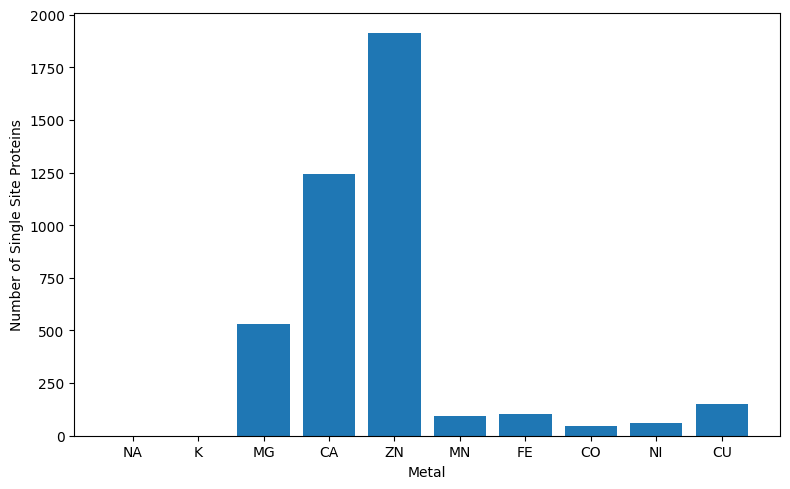

In [25]:
import matplotlib.pyplot as plt

metals = list(chain_counts.keys())
counts = list(chain_counts.values())
plt.figure(figsize=(8, 5))
plt.bar(metals,counts)

plt.xlabel("Metal")
plt.ylabel("Number of Single Site Proteins")

plt.tight_layout()
plt.show()

In [29]:
num_alkali = chain_counts['NA'] + chain_counts['K']
num_non_zn_tm = chain_counts['MN'] + chain_counts['FE'] + chain_counts['CO'] + chain_counts['CU'] + chain_counts['NI']
print("Num Alkali Metals:", num_alkali)
print("Num Non-Zn Transition Metals:", num_non_zn_tm)

Num Alkali Metals: 0
Num Non-Zn Transition Metals: 453


In [ ]:
nzntm = ["MN","FE","CO", "NI", "CU"] # Non Zn Transition Metals
allmetal3d_classes = {'MG':0,'CA':0,'ZN':0,'NZNTM':0} # Finding 100 sites for each class

for id, chain in ds:
    for resid in chain.residues:
        resname = chain.residues[resid].name
        if resname in metals_to_find:
            if resname in nzntm:
                curr_count = allmetal3d_classes['NZNTM']
                if curr_count < 100:
                    allmetal3d_classes['NZNTM'] += 1
                    parser.save(chain,f"../data/allmetal3d_testing/NZNTM/{id}.pdb")
            else:
                if curr_count < 100:
                    allmetal3d_classes[resname] += 1
                    parser.save(chain,f"../data/allmetal3d_testing/{resname}/{id}.pdb")

    total_count = sum(allmetal3d_classes.values())
    if total_count >= 400:
        break
            #parser.save(chain,f"../data/allmetal3d_testing/{id}.pdb")


In [ ]:
df = ds.get_filtered_metadata()

# pdb_code to csv from df
df['pdb_code'].to_csv('allmetal3d_test_set.csv', index=False)



In [4]:
df

,pdb_code,site_name,site_idx,n_entities,n_atoms,n_bonds,metal,n_metals,n_waters,n_organic_ligands,...,n_amino_acids,n_coordinating_amino_acids,n_nucleotides,non_residue_non_metal_names,n_non_residue_non_metal,coordination_distance,n_unresolved_removed,coordinating_residues,resolution,max_rczd
15,1foi,1foi_0,0,13,85,72,Zn,1,0,0,...,12,4,0,NaN,0,2.9,0,"1,4,10,7",1.9300,2.9
23,2c2j,2c2j_0,0,11,71,60,Mg,1,0,0,...,10,3,0,NaN,0,2.9,0,"4,5,8",2.0500,2.8
58,4ks2,4ks2_0,0,17,126,113,Ca,1,0,0,...,16,4,0,NaN,0,2.9,0,"6,14,9,2",2.5950,1.8
71,3jx0,3jx0_0,0,14,86,72,Zn,1,0,0,...,13,4,0,NaN,0,2.9,0,"5,2,11,9",2.2000,5.1
78,4mg2,4mg2_0,0,10,86,79,Mg,1,0,0,...,9,3,0,NaN,0,2.9,0,"8,4,2",2.3000,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126079,4kvk,4kvk_0,0,13,108,101,Ca,1,0,0,...,12,4,0,NaN,0,2.9,0,"8,10,6,4",1.9800,2.9
126132,4zzh,4zzh_0,0,15,109,96,Zn,1,0,0,...,14,4,0,NaN,0,2.9,0,"4,10,1,7",3.1001,0.0
126157,2zhd,2zhd_0,0,16,96,81,Ca,1,3,0,...,12,4,0,NaN,0,2.9,0,"11,7,2,4",1.9400,2.3
126194,4rvf,4rvf_0,0,13,92,81,Zn,1,0,0,...,12,4,0,NaN,0,2.9,0,"4,1,8,10",2.7000,0.6


In [ ]:
for index, row in df.iterrows():
    
    pdb_code = row['pdb_code']
    metal = row['metal']
    n_coordinating_amino_acids = row['n_coordinating_amino_acids']
    print(pdb_code,n_coordinating_amino_acids, metal)

In [4]:

all_Ni_coord = []
all_Co_coord = []
ds_index = 0
for index, row in df.iterrows():
    
    pdb_code = row['pdb_code']
    metal = row['metal']
    n_coordinating_amino_acids = row['n_coordinating_amino_acids']
    
    if metal == 'Ni':
        all_Ni_coord.append(n_coordinating_amino_acids)
    else: # Co 
        all_Co_coord.append(n_coordinating_amino_acids)    

    if n_coordinating_amino_acids > 6:
        print(f"High coordination: {pdb_code} - {metal} - {n_coordinating_amino_acids}")
        #print(ds_index)

    ds_index += 1

In [ ]:
visualize_chain_3d(ds[163][1])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [ ]:
print(len(all_Co_coord))
print(len(all_Ni_coord))

In [ ]:
# Shared bin edges
min_val = min(min(all_Ni_coord), min(all_Co_coord))
max_val = max(max(all_Ni_coord), max(all_Co_coord))
bins = np.arange(min_val, max_val + 2)  # +2 to include the top edge

plt.hist(all_Ni_coord, bins=bins, alpha=0.5, label='Ni',edgecolor='k')

plt.hist(all_Co_coord, bins=bins, alpha=0.75, label='Co',edgecolor='k')

plt.legend()

plt.xlabel('Number of coordinating amino acids')
plt.ylabel('Frequency')
plt.title('Distribution of coordinating amino acids for Ni and Co')

# Set major and minor ticks
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
# Show grid for minor ticks (optional)
ax.tick_params(which='minor', length=4, color='gray')

In [ ]:
visualize_chain_3d(ds[196][1])

In [ ]:
df[102725]